# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [44]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/Livanty/DatasetW2/refs/heads/main/penguins_size.csv') #Membaca file data csv
df.sample(10) #Menunjukan 10 data acak

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,MALE
90,Adelie,Dream,35.7,18.0,202.0,3550.0,FEMALE
174,Chinstrap,Dream,43.2,16.6,187.0,2900.0,FEMALE
259,Gentoo,Biscoe,48.7,15.7,208.0,5350.0,MALE
144,Adelie,Dream,37.3,16.8,192.0,3000.0,FEMALE
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,FEMALE
294,Gentoo,Biscoe,46.4,15.0,216.0,4700.0,FEMALE
77,Adelie,Torgersen,37.2,19.4,184.0,3900.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
270,Gentoo,Biscoe,46.6,14.2,210.0,4850.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [45]:
#2
df.info() #digunakan untuk menampilkan ringkasan informasi tentang struktur DataFrame, termasuk jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [46]:
#3
df.describe() #digunakan untuk menghasilkan statistik deskriptif (seperti mean, median, standar deviasi, dan quartiles) untuk kolom numerik dalam DataFrame.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [47]:
#4
species_count = df['species'].value_counts(dropna=False) #Menghitung jumlah kemunculan setiap spesies dalam kolom species, termasuk nilai NaN
island_count = df['island'].value_counts(dropna=False) #Menghitung jumlah kemunculan setiap island dalam kolom species, termasuk nilai NaN
sex_count = df['sex'].value_counts(dropna=False) #Menghitung jumlah kemunculan setiap sex dalam kolom species, termasuk nilai NaN

print( species_count)
print( island_count)
print( sex_count)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [48]:
#5
df = df.dropna() #Untuk menghapus baris yang memiliki nilai null, saya memilih null karena 344 data hanya ada sebagian kecil yaitu 2 data yang kosong saja
df.isnull().sum() #Untuk menghitung nilai null

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

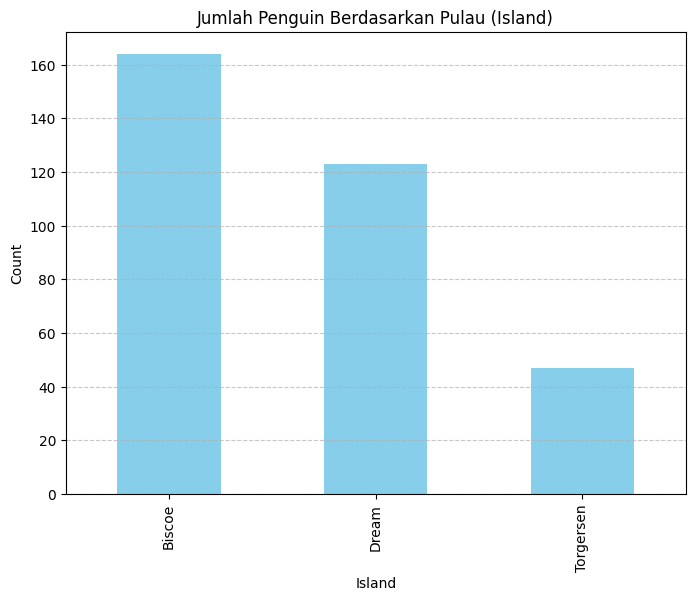

In [49]:
#6
# Membuat Bar Plot jumlah penguin berdasarkan pulau (island)
island_count = df['island'].value_counts() # Menghitung jumlah kemunculan setiap nilai unik dalam kolom island dari DataFrame df menggunakan value_counts()

# Membuat Bar Plot
plt.figure(figsize=(8, 6)) # Untuk mengatur ukuran
island_count.plot(kind='bar', color='skyblue') # Membuat Bar Plot dari data di island_count dengan jenis plot 'bar' dan warna batang 'skyblue'
plt.title('Jumlah Penguin Berdasarkan Pulau (Island)')
plt.xlabel('Island')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7) #Menambahkan garis grid horizontal pada sumbu-y untuk membantu visualisas
plt.show() #Menampilkan plot yang telah dibuat

# Visualisasi ini menunjukan jumlah penguin berdasarkan pulau jika kita melihat bahwa jumlah penguin terbanyak ada di biscoe, diikuti oleh Dream, sementara Torgersen memiliki jumlah penguin paling sedikit.


<Figure size 800x600 with 0 Axes>

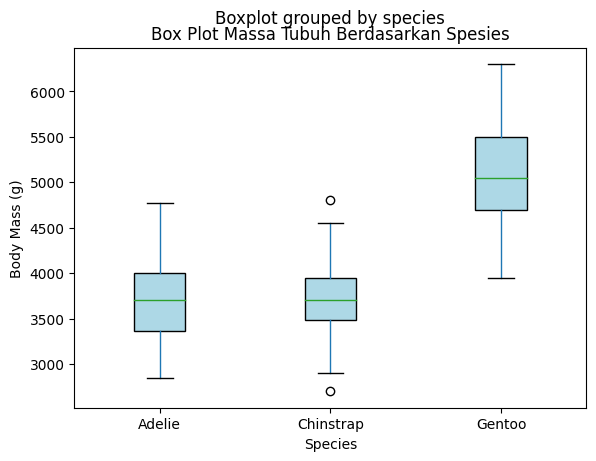

In [50]:
# Membuat Box Plot massa tubuh berdasarkan spesies
plt.figure(figsize=(8, 6))
df.boxplot(column='body_mass_g', by='species', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue')) # Membuat boxplot dari kolom 'body_mass_g' (massa tubuh penguin dalam gram), dikelompokkan berdasarkan kolom 'species'.

plt.title('Box Plot Massa Tubuh Berdasarkan Spesies')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

# Visualisasi ini menunjukan massa tubuh penguin berdasarkan spesies mereka jika kita lihat spesies gentoo memiliki massa tubuh yang lebih berat dari pada 2 spesies lainnya.

7. Check unique value of our target variable

In [51]:
#7
print(df['species'].unique()) # Untuk melihat nilai unik dari kolom species

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [52]:
#8
label_encoder = LabelEncoder() # Membuat objek LabelEncoder dari scikit-learn, yang digunakan untuk mengubah data kategorikal menjadi nilai numerik
df['island']=label_encoder.fit_transform(df['island']) # Menerapkan Label Encoding pada kolom island
df['sex']=label_encoder.fit_transform(df['sex']) #Menerapkan Label Encoding pada kolom sex
df.head() #Menunjukan 5 data teratas

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


9. encode the target column and display the results

In [53]:
#9
label_encoder = LabelEncoder() # Membuat objek LabelEncoder dari scikit-learn, yang digunakan untuk mengubah data kategorikal menjadi nilai numerik
df['species']=label_encoder.fit_transform(df['species']) # Menerapkan Label Encoding pada kolom species
df.head() #Menunjukan 5 data teratas

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


10. create a heatmap to see the correlation and explain the conclusion

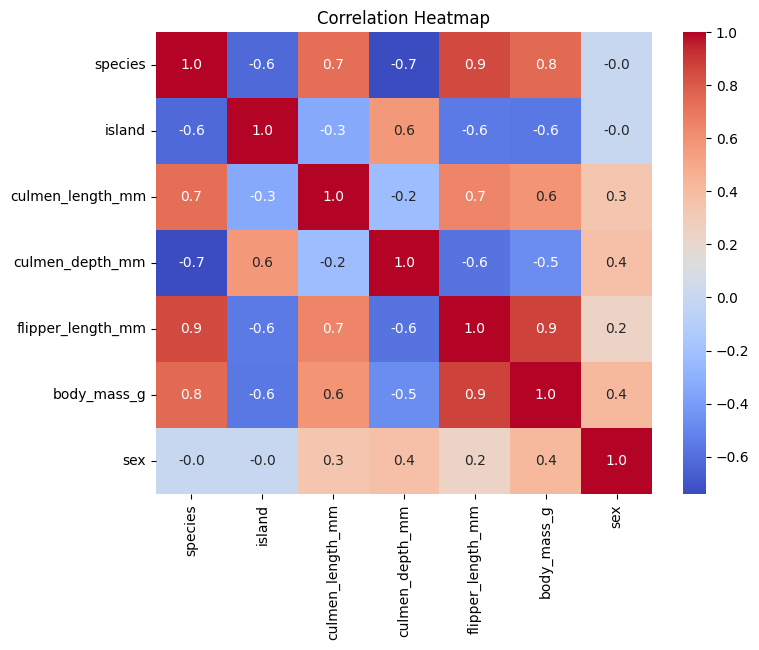

In [54]:
#10
correlation_matrix = df.corr() #Menghitung korelasi antar kolom numerik dalam DataFrame df menggunakan metode .corr()
plt.figure(figsize=(8, 6)) # untuk ukuran heat map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f") #embuat heatmap menggunakan matriks korelasi yang dihitung sebelumnya.
plt.title('Correlation Heatmap') #judul
plt.show()

## Machine Learning

1. Splitting X and y

In [55]:
#1
X = df.drop(['species'], axis = 1) #Membuat variabel X yang berisi semua kolom dari DataFrame df, kecuali kolom species.
y = df['species'] #Membuat variabel y yang berisi kolom species dari DataFrame df.

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [56]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) #untuk membagi dataset menjadi dua bagian: satu untuk pelatihan (training 80%) dan satu untuk pengujian (testing 20%).

In [57]:
#3
X_train.shape, X_test.shape # untuk menunjukkan jumlah baris dan kolom

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [58]:
#Criterion Entropy
#a
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [59]:
#b
y_pred_en = clf_en.predict(X_test) #untuk mendapatkan hasil prediksi tentang spesies penguin dari data pengujian

In [60]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) #print hasil akurasi


Model accuracy score with criterion entropy: 0.9701


In [61]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

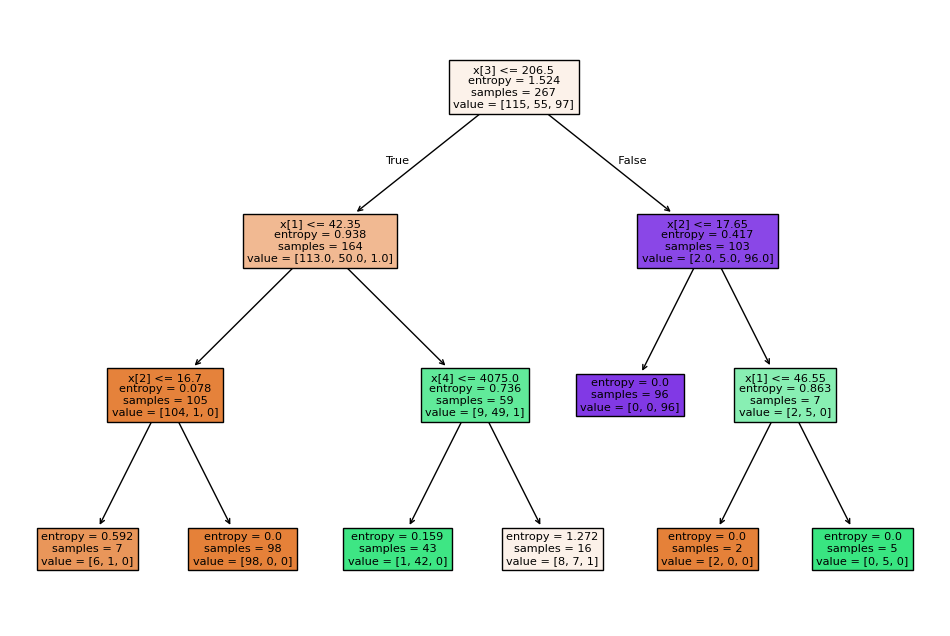

In [82]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled=True) #Membuat tree yang ada warnanya


2. Criterion Gini index

In [63]:
#a

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [64]:
#b
y_pred_gini = clf_gini.predict(X_test)  #untuk mendapatkan hasil prediksi tentang spesies penguin dari data pengujian menggunakan gini

In [65]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #Untuk print hasil akurasi

Model accuracy score with criterion gini: 0.9851


In [66]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

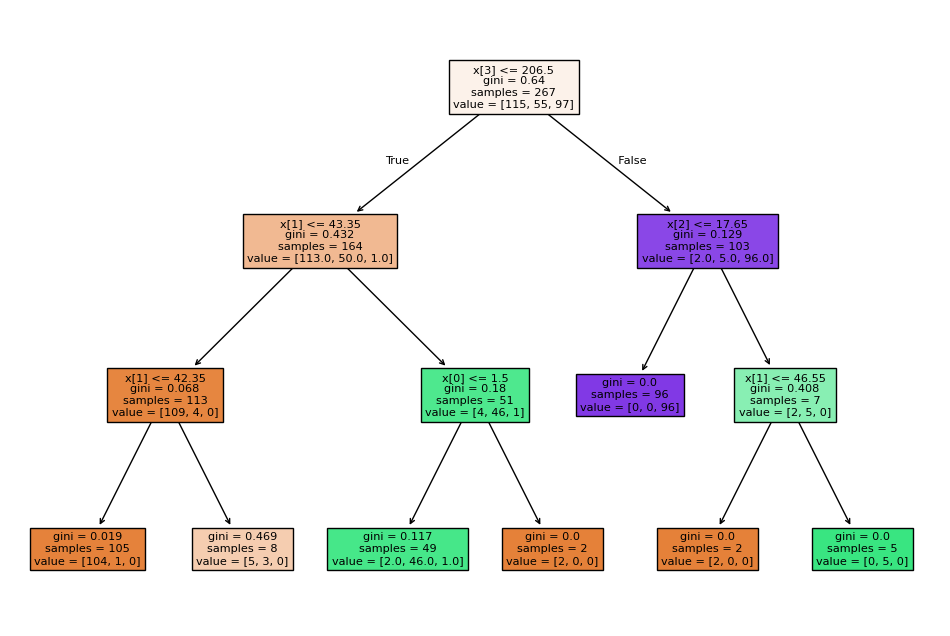

In [83]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True) #membuat dan menujukan tree


3. Confusion matrix and classification report of criterion Entropy and Gini index

In [68]:
#f
cm = confusion_matrix(y_test, y_pred_en) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cm)

cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion Matrix:
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [69]:
#g
print(classification_report(y_test, y_pred_en)) #untuk membuat dan print classificaton report
print(classification_report(y_test, y_pred_gini))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [70]:
#h
#  Kedua model menunjukkan performa yang sangat baik dalam mengklasifikasikan spesies penguin berdasarkan kolom yang ada, baik untuk train set dan test set. Keduanya mendapatkan akurasi diatas 90 %
#  Namun jika kita lihat model dengan kriteria gini memberikan hasil yang lebih akurat dibandingkan dengan kriteria entropy.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [71]:
#a
nb_classifier = GaussianNB() # untuk menginstansiasi objek Gaussian Naive Bayes dari pustaka scikit-learn.
nb_classifier.fit(X_train, y_train) # untuk melatih model Naive Bayes yang telah dibuat (nb_classifier) dengan data fitur X_train dan label y_train.

GaussianNB()

In [72]:
#b
nb_y_pred = nb_classifier.predict(X_test) # untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya (nb_classifier).

In [73]:
#c
cm = confusion_matrix(y_test, nb_y_pred) #Untuk membuat confussion matrix dari nb
print("Confusion Matrix:\n", cm)

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred))) #Untuk menujukan hasil akurasi

Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score: 1.0000


In [74]:
#e
print(classification_report(y_test, nb_y_pred)) #Untuk print classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [75]:
#f
#  Akurasi model mencapai 100%, yang menunjukkan bahwa semua prediksi pada data pengujian benar.
# Hasil ini menunjukkan bahwa model Naive Bayes sangat efektif dalam konteks ini, dan dapat diandalkan untuk melakukan prediksi spesies penguin berdasarkan fitur yang ada.

Good Luck :)

In [76]:
# Menggunakan Metode KNN
# a define the model
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean') # Membuat model KNN dengan 5 tetangga terdekat dan menggunakan metric euclidean
classifier.fit(X_train, y_train) # Untuk melatih model


KNeighborsClassifier(metric='euclidean')

In [77]:
# b. Predict the test set results
y_pred = classifier.predict(X_test) # Membuat prediksi y_pred dari model klasifikasi menggunakan X_test

# Membuat dataframe untuk membandingkan y_test dan y_pred secara berdampingan
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
comparison_table = comparison_table.reset_index(drop=True)
comparison_table.head()


,y_test,y_pred
0,0,1
1,2,2
2,0,0
3,1,1
4,0,1


In [78]:
#c. Check accuracy score
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred))) #Untuk menujukan hasil akurasi

# d. Confusion matrix
# Display the accuracy score
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n", cm)


Accuracy Score: 0.8209
Confusion Matrix:
 [[25  2  4]
 [ 5  8  0]
 [ 0  1 22]]


In [79]:
# e. Classification report
print(classification_report(y_test, y_pred)) #Untuk print classification report


              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.73      0.62      0.67        13
           2       0.85      0.96      0.90        23

    accuracy                           0.82        67
   macro avg       0.80      0.79      0.79        67
weighted avg       0.82      0.82      0.82        67



In [80]:
# f. Results and conclusion
# Model KNN yang digunakan menunjukkan kinerja yang cukup baik sebenarnya karena secara keseluruhan dengan akurasi lebih dari 80%. Namun jika dibandingkan dengan GINI, Entropi maupun Naive Bayes, KNN ini memiliki skor yang paling rendah
# sehingga untuk prediksi spesies penguin ini lebih disarankan menggunakan 1. naive 2. gini 3. entropi 4. KNN